## Prepare city
The method is time consuming, so for the demonstration we will mask some of the blocks. 

In [1]:
from blocksnet import City, Accessibility

city = City.from_pickle('../data/model.pickle')

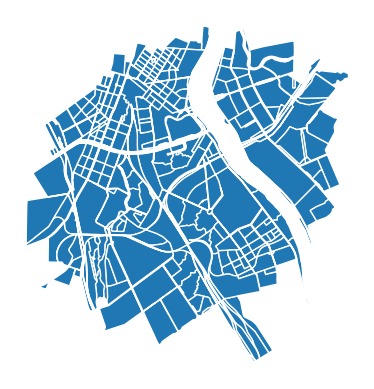

In [2]:
blocks = city.get_blocks_gdf(True)
nearest_blocks = blocks.sjoin_nearest(blocks[blocks.index == 1445], distance_col='distance')
nearest_blocks = nearest_blocks[nearest_blocks['distance']<=3000]
nearest_blocks.plot().set_axis_off()

In [3]:
city._blocks = {i:city[i] for i in nearest_blocks.index}

## Integration

In [5]:
from blocksnet.method.integration import Integration, IntegrationType

integ = Integration(city_model=city)

  0%|          | 0/5095 [00:00<?, ?it/s]

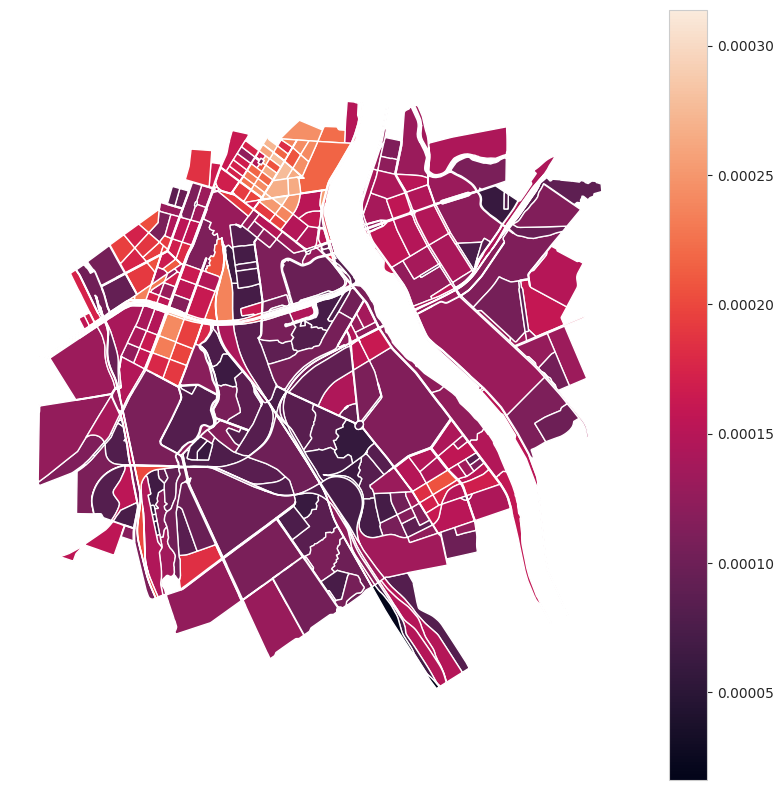

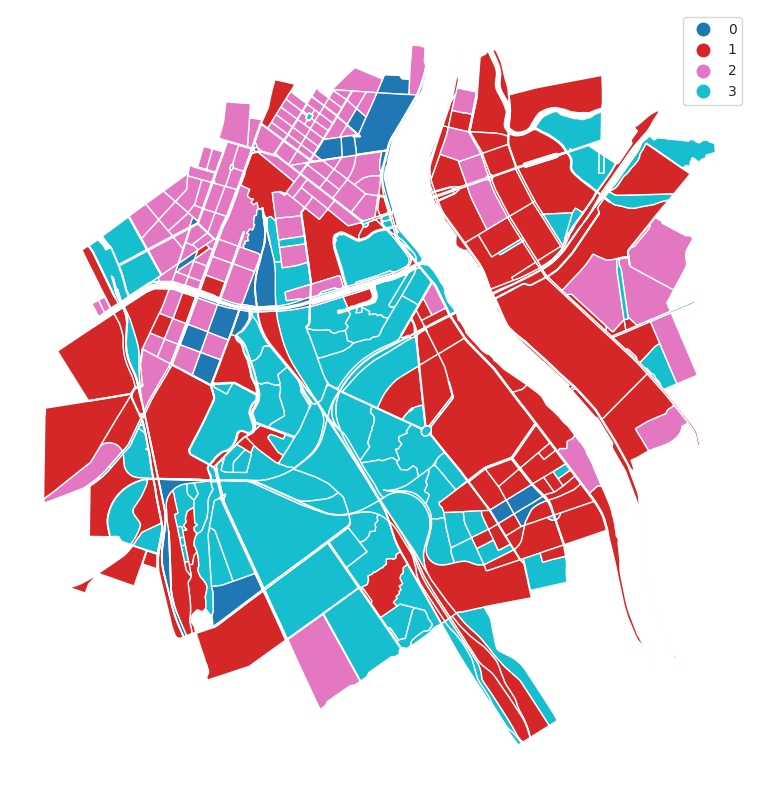

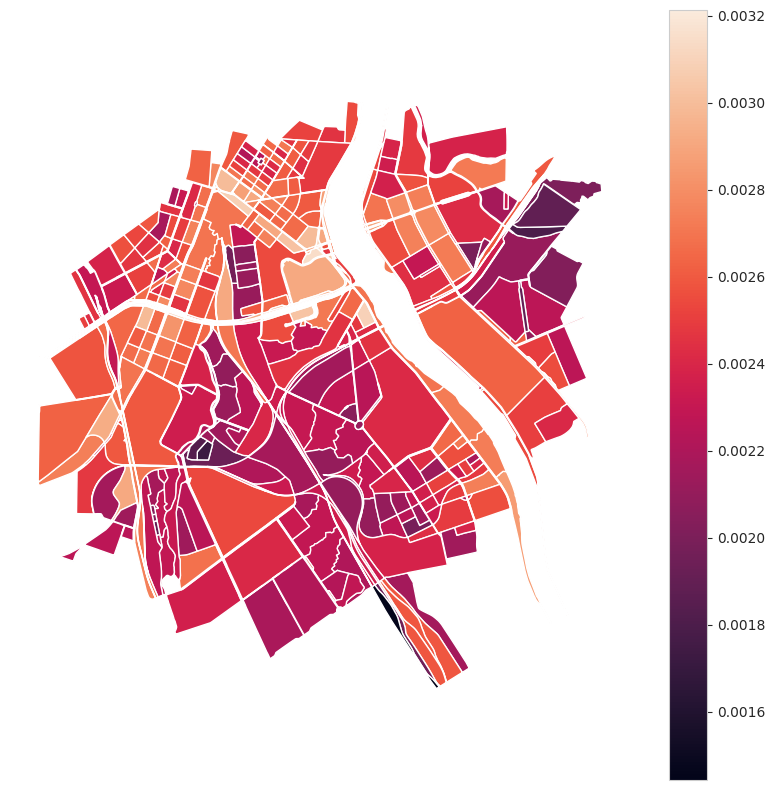

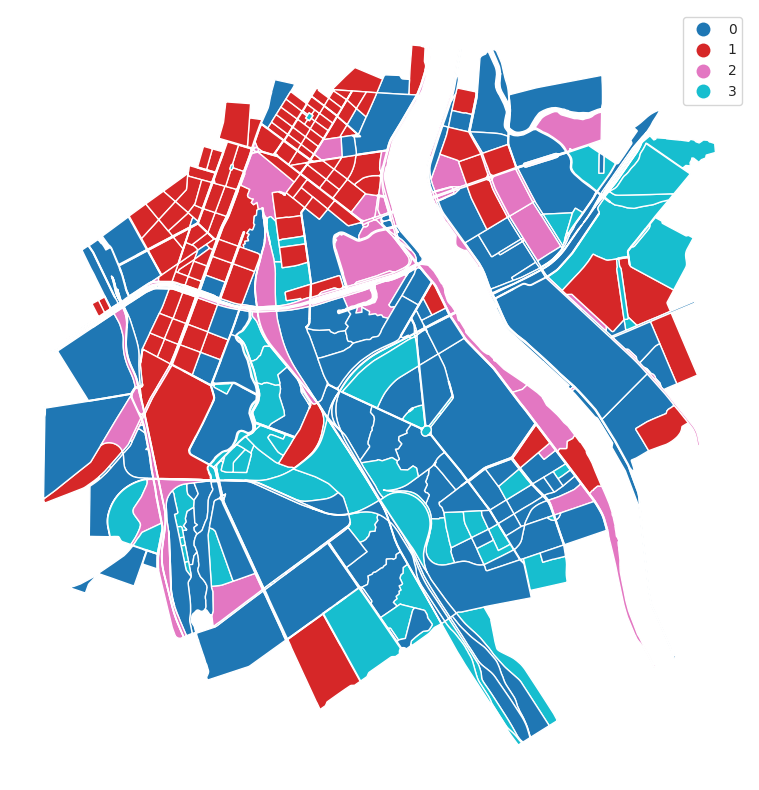

In [6]:
for integration_type in IntegrationType:
  res = integ.calculate(integration_type)
  res = integ.clusterize(res)
  integ.plot(res, column='integration')
  integ.plot(res, column='cluster')